In [43]:
import gzip
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from collections import Counter
import seaborn as sns 
from matplotlib.ticker import StrMethodFormatter



In [44]:
data_complete = pd.read_csv('NYC_listings.csv', nrows=1000, error_bad_lines=False)
data_complete.fillna(0, inplace=True)

price = data_complete['price']
prices=[]

for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

data_complete['price']=prices

data_complete = pd.DataFrame(data_complete)
data_complete

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181206022948,2018-12-06,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,0,...,f,0.0,0.0,f,f,strict_14_with_grace_period,f,f,3,1.42
1,21456,https://www.airbnb.com/rooms/21456,20181206022948,2018-12-06,Light-filled classic Central Park,"An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...",none,"Diverse. Great coffee shops and restaurants, n...",...,f,0.0,0.0,f,f,moderate,t,t,1,0.72
2,2539,https://www.airbnb.com/rooms/2539,20181206022948,2018-12-06,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,0.0,0.0,f,f,moderate,f,f,8,0.25
3,2595,https://www.airbnb.com/rooms/2595,20181206022948,2018-12-06,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,0.0,0.0,f,f,strict_14_with_grace_period,t,t,2,0.37
4,21644,https://www.airbnb.com/rooms/21644,20181206022948,2018-12-06,"Upper Manhattan, New York",A great space in a beautiful neighborhood- min...,Nice room in a spacious pre-war apartment in u...,A great space in a beautiful neighborhood- min...,none,I love that the neighborhood is safe to walk a...,...,f,0.0,0.0,f,f,strict_14_with_grace_period,f,f,1,0.51
5,3330,https://www.airbnb.com/rooms/3330,20181206022948,2018-12-06,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,f,0.0,0.0,f,f,strict_14_with_grace_period,f,f,3,0.35
6,21794,https://www.airbnb.com/rooms/21794,20181206022948,2018-12-06,COZY QUIET room 4 DOOGLERS!,"It's comfy & has a loft bed & a chaise lounge,...",This is the smaller room of the two I have ava...,"It's comfy & has a loft bed & a chaise lounge,...",none,GREAT Central Location. On 15th street between...,...,f,0.0,0.0,f,f,strict_14_with_grace_period,f,f,2,0.25
7,3647,https://www.airbnb.com/rooms/3647,20181206022948,2018-12-06,THE VILLAGE OF HARLEM....NEW YORK !,0,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,0,...,f,0.0,0.0,f,f,strict_14_with_grace_period,t,t,1,0.00
8,22911,https://www.airbnb.com/rooms/22911,20181206022948,2018-12-06,The Stuydio Modern and Light Filled,"Make your NY story in our welcoming, home away...",Welcome to The Stuydio! As featured in The New...,"Make your NY story in our welcoming, home away...",none,"Beautiful and historic, our neighborhood has a...",...,f,0.0,0.0,t,f,strict_14_with_grace_period,t,t,3,1.32
9,22918,https://www.airbnb.com/rooms/22918,20181206022948,2018-12-06,loft bed - near transportation-15min to times sq,very close to public transportation and quick ...,"i have a small, clean room i am renting in a b...",very close to public transportation and quick ...,none,i'm located between 2 big avenues with public ...,...,f,0.0,0.0,t,f,moderate,f,f,3,1.82


In [45]:
for col in data_complete.columns: 
    print(col)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
cal

In [46]:
#Replace NaN 
data_complete.loc[data_complete['reviews_per_month'].isnull(),'reviews_per_month']=0
data_complete.loc[data_complete['square_feet'].isnull(),'square_feet']=0
data_complete.loc[data_complete['review_scores_rating'].isnull(),'review_scores_rating']=0
data_complete.loc[data_complete['review_scores_value'].isnull(),'review_scores_value']=0
data_complete.loc[data_complete['neighbourhood'].isnull(),'neighbourhood']='Not Specified'
data_complete.loc[data_complete['bathrooms'].isnull(),'bathrooms']='Not Specified'
data_complete.loc[data_complete['beds'].isnull(),'beds']='Not Specified'

In [47]:
#Create a df from columns need for analysis
NYC_listing_df = data_complete[['host_id','host_is_superhost',
                                'neighbourhood','city','state','property_type',
                                'room_type','accommodates','bathrooms','bedrooms','neighbourhood_cleansed',
                                'beds','bed_type','amenities','square_feet','price','host_total_listings_count',
                               'availability_30', 'availability_60','availability_90', 'availability_365',
                               'number_of_reviews', 'review_scores_rating', 'review_scores_value']]
NYC_listing_df

,host_id,host_is_superhost,neighbourhood,city,state,property_type,room_type,accommodates,bathrooms,bedrooms,...,square_feet,price,host_total_listings_count,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_value
0,2758,t,Harlem,New York,NY,Apartment,Private room,3,1,1.0,...,0.0,59.0,3,3,12,23,298,175,93.0,9.0
1,42032,f,Upper West Side,New York,NY,Apartment,Entire home/apt,2,1,1.0,...,0.0,140.0,1,8,8,13,248,76,94.0,10.0
2,2787,t,Kensington,Brooklyn,NY,Apartment,Private room,4,1,1.0,...,0.0,149.0,8,30,60,90,365,9,98.0,10.0
3,2845,f,Midtown,New York,NY,Apartment,Entire home/apt,2,1,0.0,...,0.0,225.0,5,15,45,75,350,41,95.0,9.0
4,82685,f,Hamilton Heights,New York,NY,Apartment,Private room,1,1,1.0,...,0.0,89.0,1,30,60,90,365,1,100.0,8.0
5,4177,f,Williamsburg,Brooklyn,NY,Apartment,Private room,2,1,1.0,...,0.0,70.0,4,11,12,12,216,38,98.0,10.0
6,83257,t,Meatpacking District,New York,NY,Apartment,Private room,2,1,1.0,...,220.0,111.0,2,24,54,84,359,26,99.0,10.0
7,4632,f,Harlem,New York,NY,Apartment,Private room,2,1,1.0,...,0.0,150.0,1,30,60,90,365,0,0.0,0.0
8,87773,f,0,Brooklyn,NY,Apartment,Entire home/apt,4,1,1.0,...,0.0,125.0,4,0,2,2,250,140,92.0,9.0
9,32294,f,0,New York,NY,Apartment,Private room,2,1,1.0,...,0.0,60.0,3,0,0,0,5,10,82.0,8.0


In [48]:
NYC_listing_df = NYC_listing_df.rename(columns={"host_id": "Host ID",
                                             "host_is_superhost": "Host Is Superhost",
                                             "neighbourhood": "Neighbourhood",
                                             "city": "City",
                                              "state": "State",
                                             "property_type": "Property Type",
                                             "room_type": "Room Type",
                                              "accommodates": "Accomodates",
                                              "bathrooms": "Bathrooms",
                                              "bedrooms": "Bedrooms",
                                             "bed_type": "Bed Type",
                                             "amenities": "Amenities",
                                             "square_feet": "Square Feet",
                                             "host_total_listings_count": "Host Total Listings Count",
                                             "availability_30": "Availability 30",
                                             "availability_60": "Availability_60",
                                             "availability_90": "Availability_90",
                                             "availability_365": "availability_365",
                                             "number_of_reviews": "Number of Reviews",
                                             "review_scores_rating": "Review Scores Rating",
                                            "review_scores_value": "Review Scores Value"})

NYC_listing_df.head()

,Host ID,Host Is Superhost,Neighbourhood,City,State,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,...,Square Feet,price,Host Total Listings Count,Availability 30,Availability_60,Availability_90,availability_365,Number of Reviews,Review Scores Rating,Review Scores Value
0,2758,t,Harlem,New York,NY,Apartment,Private room,3,1,1.0,...,0.0,59.0,3,3,12,23,298,175,93.0,9.0
1,42032,f,Upper West Side,New York,NY,Apartment,Entire home/apt,2,1,1.0,...,0.0,140.0,1,8,8,13,248,76,94.0,10.0
2,2787,t,Kensington,Brooklyn,NY,Apartment,Private room,4,1,1.0,...,0.0,149.0,8,30,60,90,365,9,98.0,10.0
3,2845,f,Midtown,New York,NY,Apartment,Entire home/apt,2,1,0.0,...,0.0,225.0,5,15,45,75,350,41,95.0,9.0
4,82685,f,Hamilton Heights,New York,NY,Apartment,Private room,1,1,1.0,...,0.0,89.0,1,30,60,90,365,1,100.0,8.0


In [49]:
NYC_neighbourhood_total = len(NYC_listing_df['neighbourhood_cleansed'].unique())
NYC_neighbourhood_total

96

In [50]:
#Breakdown by the number of listings per neighbourhood
NYC_neighbourhoods = NYC_listing_df.loc[:,'neighbourhood_cleansed'].value_counts()
NYC_neighbourhoods.head()

Williamsburg          115
Harlem                 86
Bedford-Stuyvesant     71
East Village           67
Greenpoint             51
Name: neighbourhood_cleansed, dtype: int64

In [51]:
# new_NYC_neighbourhoods = NYC_neighbourhoods.drop("Not Specified")
# new_NYC_neighbourhoods.head()

In [52]:
NYC_neighbourhoods = pd.DataFrame(NYC_neighbourhoods)
NYC_neighbourhoods.head()

,neighbourhood_cleansed
Williamsburg,115
Harlem,86
Bedford-Stuyvesant,71
East Village,67
Greenpoint,51


In [53]:
new_NYC_neighbourhoods = NYC_neighbourhoods.rename(columns={'neighbourhood_cleansed': "Number of Listings"})
new_NYC_neighbourhoods.head()

,Number of Listings
Williamsburg,115
Harlem,86
Bedford-Stuyvesant,71
East Village,67
Greenpoint,51


In [54]:
#new_NYC_neighbourhoods['Number of Listings'].sum()

In [55]:
top_NYC_neighbourhoods = new_NYC_neighbourhoods['Number of Listings'][:5]
top_NYC_neighbourhoods

Williamsburg          115
Harlem                 86
Bedford-Stuyvesant     71
East Village           67
Greenpoint             51
Name: Number of Listings, dtype: int64

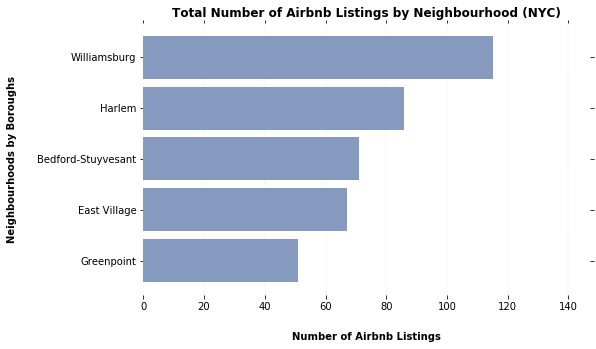

In [56]:
ax = top_NYC_neighbourhoods.plot(kind='barh', figsize=(8, 5), color= '#8699bf', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals1 = ax.get_xticks()

for tick in vals1:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)   


ax.set_alpha(0.8)   
ax.set_title("Total Number of Airbnb Listings by Neighbourhood (NYC)",fontsize=12, fontweight='bold')    
ax.set_xlabel("Number of Airbnb Listings", labelpad=20, weight='bold', size=10)
ax.set_ylabel("Neighbourhoods by Boroughs", labelpad=20, weight='bold', size=10)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.invert_yaxis()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [57]:
top_NYC_neighbourhoods_by_city = NYC_listing_df.loc[:,'City'].value_counts()
top_NYC_neighbourhoods_by_city

New York                                  466
Brooklyn                                  460
Queens                                     35
Staten Island                              12
Bronx                                      11
Long Island City                            4
Jamaica                                     2
Briarwood                                   2
NY                                          1
Long Island                                 1
Astoria                                     1
Brooklyn                                    1
Wadsworth Terrace, Manhattan, New York      1
Riverdale                                   1
Elmhurst                                    1
Rockaway Beach                              1
Name: City, dtype: int64

In [58]:
top_NYC_neighbourhoods_by_city = pd.DataFrame(top_NYC_neighbourhoods_by_city)
top_NYC_neighbourhoods_by_city

,City
New York,466
Brooklyn,460
Queens,35
Staten Island,12
Bronx,11
Long Island City,4
Jamaica,2
Briarwood,2
NY,1
Long Island,1


In [59]:
top_NYC_neighbourhoods_by_city = top_NYC_neighbourhoods_by_city.rename(columns={'City': "Number of Listings"})
top_NYC_neighbourhoods_by_city.head()
#top_NYC_neighbourhoods_by_city.sum()

,Number of Listings
New York,466
Brooklyn,460
Queens,35
Staten Island,12
Bronx,11


In [60]:
top5_NYC_neighbourhoods_by_city = top_NYC_neighbourhoods_by_city['Number of Listings'][:5]
top5_NYC_neighbourhoods_by_city

New York         466
Brooklyn         460
Queens            35
Staten Island     12
Bronx             11
Name: Number of Listings, dtype: int64

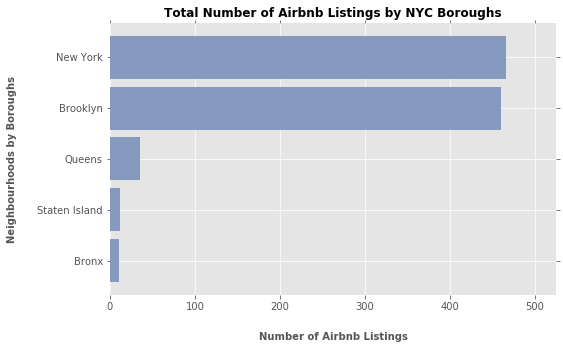

In [78]:
ax = top5_NYC_neighbourhoods_by_city.plot(kind='barh', figsize=(8, 5), color= '#8699bf', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals1 = ax.get_xticks()

for tick in vals1:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)   


ax.set_alpha(0.8)   
ax.set_title("Total Number of Airbnb Listings by NYC Boroughs",fontsize=12, fontweight='bold')    
ax.set_xlabel("Number of Airbnb Listings", labelpad=20, weight='bold', size=10)
ax.set_ylabel("Neighbourhoods by Boroughs", labelpad=20, weight='bold', size=10)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.invert_yaxis()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
    
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

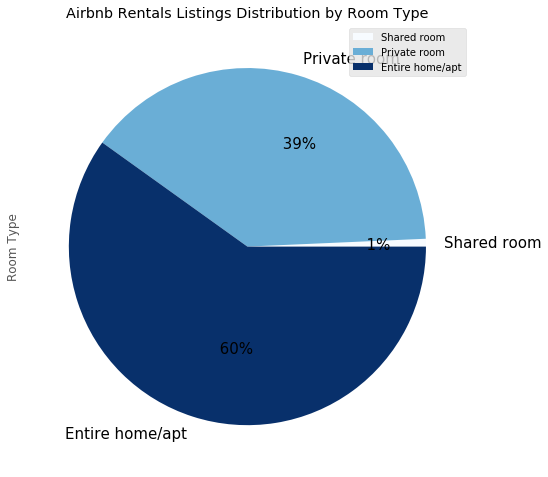

In [91]:
#room type visualizations 

matplotlib.style.use('ggplot')

room = data_complete.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['Room Type']
room_df.plot.pie(y = 'Room Type', 
                 colormap = 'Blues', 
                 figsize=(8,10), 
                 fontsize = 15, autopct = '%11.f%%',
                 legend = "upper left",
                 title = 'Airbnb Rentals Listings Distribution by Room Type')

#make title bold, and text smaller